In [18]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model


# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import seaborn as sns

from sklearn.manifold import TSNE


In [2]:
path = r"D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\Final Data for Model\train\cancer"

os.chdir(path)


mammography = []


with os.scandir(path) as files :
    for file in files :
        if file.name.endswith('.jpg'):
            mammography.append(file.name)
            
print(mammography[:15])

['A_1000_1.LEFT_CC_crop_0.jpg', 'A_1000_1.LEFT_MLO_crop_0.jpg', 'A_1000_1.RIGHT_CC_crop_0.jpg', 'A_1000_1.RIGHT_MLO_crop_0.jpg', 'A_1001_1.LEFT_CC_crop_0.jpg', 'A_1001_1.LEFT_MLO_crop_0.jpg', 'A_1001_1.RIGHT_CC_crop_0.jpg', 'A_1001_1.RIGHT_MLO_crop_0.jpg', 'A_1002_1.LEFT_CC_crop_0.jpg', 'A_1002_1.LEFT_MLO_crop_0.jpg', 'A_1002_1.RIGHT_CC_crop_0.jpg', 'A_1002_1.RIGHT_MLO_crop_0.jpg', 'A_1003_1.LEFT_CC_crop_0.jpg', 'A_1003_1.LEFT_MLO_crop_0.jpg', 'A_1003_1.RIGHT_CC_crop_0.jpg']


In [3]:
# load model
model=load_model(r"D:\Ambis Kuliah\Semester 7\NAIST Internship\Breast Cancer Project\Program\bcancer_modelv3.h5")
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496 

In [4]:
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [5]:
data={}

p = 'feat.pkl'

for mamph in mammography:
    try:
        feat = extract_features(mamph,model)
        data[mamph] = feat
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 24ms/step


In [6]:
filenames = np.array(list(data.keys()))

feat = np.array(list(data.values()))
feat.shape

(2732, 1, 512)

In [7]:
feat = feat.reshape(-1,2048)
feat.shape

(683, 2048)

In [45]:
tsne = TSNE(n_components=2, random_state=42)
tsne1 = tsne.fit_transform(feat)

tsne.kl_divergence_

0.5306333303451538

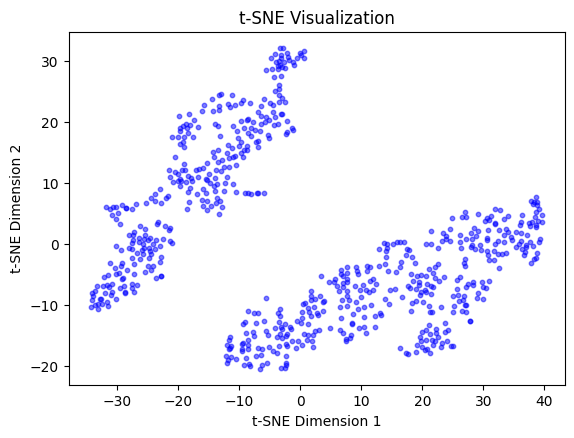

In [55]:
tx = tsne1[:, 0]
ty = tsne1[:, 1]

fig, ax = plt.subplots()
ax.scatter(tx, ty, s=10, alpha=0.5, color="blue")

ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

ax.set_title("t-SNE Visualization")

ax.set_aspect("equal")
plt.show()
